In [46]:
import pandas as pd
import matplotlib
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [47]:
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

usecols = list(range(12)) # [0,1,...,11]
col_names = ['id', 'diagnosis'] + mean_features # só define os nomes das colunas

df = pd.read_csv("wdbc.data", header=None, usecols=usecols, names=col_names)

print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419   

In [48]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

X = df[mean_features]
Y = df['diagnosis']

 ## 20% do df vai ser para teste e 80% para treinamento 
 ## 42 é pra o embaralhamento entre quais saõ de teste e quais são de validação serem sempre as mesmas
 ## 42 especificamente pq essa é a resposta pra vida, universo e tudo ! (o motivo deve ser esse eu acho)
x_train, x_valid, y_train, y_valid = train_test_split(X,Y, test_size=0.2, random_state=42)

 ## mostra o tamanho dos sets
print("Tamanhos de treino e validaçao\nx é uma matriz de amostras x propriedades y é so amostras")
print("x_train:", x_train.shape)
print("x_valid:", x_valid.shape)
print("y_train:", y_train.shape)
print("y_valid:", y_valid.shape)

Tamanhos de treino e validaçao
x é uma matriz de amostras x propriedades y é so amostras
x_train: (455, 10)
x_valid: (114, 10)
y_train: (455,)
y_valid: (114,)


In [49]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)

x_train_scaled[:5]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1.93033305,  0.95437877],
       [-0.98179678,  1.41622208, -0.98258746, -0.86694414,  0.05938999,
        -0.59678772, -0.82020317, -0.84511471,  0.31326409,  0.07404147],
       [-1.11769991, -1.0102595 , -1.12500192, -0.96594206,  1.26951116,
        -0.43900185, -0.98334145, -0.93059974,  3.39443604,  0.95021314]])

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

Valores reais (y_valid): [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0]
Valores previstos (y_pred): [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0]
Acurácia: 0.9649


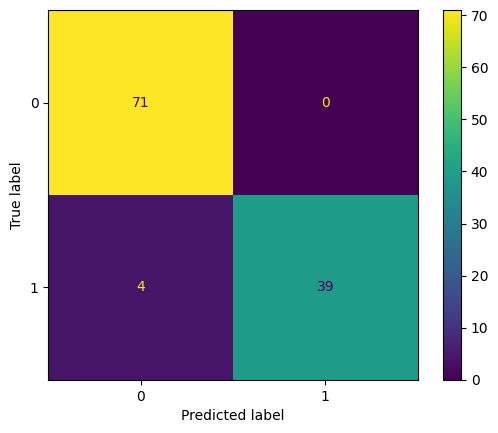

In [51]:
y_pred = model.predict(x_valid_scaled)

print("Valores reais (y_valid):", y_valid[:15].values)
print("Valores previstos (y_pred):", y_pred[:15])


acuracia = accuracy_score(y_valid, y_pred)
print(f'Acurácia: {acuracia:.4f}')

matrix_confusion = confusion_matrix(y_valid, y_pred)
ConfusionMatrixDisplay(matrix_confusion).plot()